In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [3]:
df =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv", delimiter=",") 

In [4]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
X = df.loc[:, df.columns != 'Classification']
y = df.loc[:, df.columns == 'Classification']

In [6]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.20, random_state=0)

In [73]:
print(X_trainset.shape)
print(y_trainset.shape)

(92, 9)
(92, 1)


In [74]:
print(X_testset.shape)
print(y_testset.shape)

(24, 9)
(24, 1)


In [75]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainset = sc.fit_transform(X_trainset)
X_testset = sc.transform(X_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


# Dimension Reduction

In [76]:
# Applying LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA(n_components = 8)
#X_trainset = lda.fit_transform(X_trainset, y_trainset)
#X_testset = lda.transform(X_testset)

In [77]:
#X_testset

## Kernel PCA

In [105]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 7, kernel = 'rbf')
X_trainset = kpca.fit_transform(X_trainset)
X_testset = kpca.transform(X_testset)

In [106]:
X_testset

array([[ 2.13220414e-01,  2.49675750e-01, -1.64298302e-01,
        -9.57085718e-02,  1.91128581e-02, -2.63561351e-02,
         1.64476880e-02],
       [-1.00862328e-01,  1.66526193e-01,  1.11319271e-01,
         5.05869585e-02, -8.59500320e-02,  1.90351007e-03,
        -3.00047025e-02],
       [ 2.30546206e-01, -1.16852518e-01, -1.38096256e-01,
         1.38911995e-01, -7.74033376e-03, -9.50534455e-03,
        -3.07593535e-02],
       [ 2.25419462e-01, -1.89029993e-01,  1.13381952e-01,
         2.56258323e-02,  1.56807929e-01,  2.84108619e-02,
        -1.50815485e-02],
       [ 2.07882215e-01,  5.57590726e-03,  1.79012386e-01,
        -3.20247922e-02, -4.86101475e-02,  4.77703498e-02,
         3.57196102e-03],
       [-1.22297262e-01,  1.47420815e-01,  1.23791271e-01,
         6.32604592e-02,  2.15620041e-02,  1.94014352e-03,
        -3.61120678e-02],
       [-2.30582521e-01,  6.34903676e-02,  3.34180902e-02,
         1.31635533e-01, -9.78964417e-02,  5.70844592e-03,
         2.4635424

# Using KNN for classification

In [133]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_trainset, y_trainset)

# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
knn_acuracy = acuracy.mean()
knn_precision_score = precision_score(y_pred, y_testset)
knn_recall_score = recall_score(y_pred, y_testset)
knn_f1_score = f1_score(y_pred, y_testset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array

In [135]:
print(knn_cm)
print(knn_precision_score)
print(knn_recall_score)
print(knn_f1_score)

[[ 6  5]
 [ 2 11]]
0.5454545454545454
0.75
0.631578947368421


# Using SVM for classification


In [109]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_trainset, y_trainset)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [110]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
svm_acuracy = acuracy.mean()


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [111]:
svm_cm

array([[ 5,  6],
       [ 1, 12]])

# Using Kernel SVM for classification


In [112]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [113]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
ksvm_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
ksvm_acuracy = acuracy.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change f

In [114]:
ksvm_cm

array([[ 0, 11],
       [ 0, 13]])

# Using Naive Bayes for classification

In [115]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:

# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
naive_base_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
naive_bayes_acuracy = acuracy.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [117]:
naive_base_cm

array([[ 7,  4],
       [ 2, 11]])

# Using Decission Tree classification


In [118]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [119]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
tre_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
tree_acuracy = acuracy.mean()

In [120]:
tre_cm

array([[5, 6],
       [4, 9]])

# Using Random Forest Classification

In [121]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [122]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
random_tree_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
random_tree_acuracy = acuracy.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: Dat

In [123]:
random_tree_cm

array([[ 8,  3],
       [ 1, 12]])

# Logistic Regression classification

In [124]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_trainset, y_trainset)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [125]:
# Predicting the Test set results
y_pred = classifier.predict(X_testset)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
logistic_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
logistic_acuracy = acuracy.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Py

In [126]:
logistic_cm

array([[ 2,  9],
       [ 1, 12]])

# XGBoost classifier

In [127]:
#pip install xgboost


In [128]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_trainset, y_trainset)
y_pred = classifier.predict(X_testset)
xgboost_cm = confusion_matrix(y_testset, y_pred)
acuracy  = cross_val_score(estimator = classifier, X=X_trainset, y=y_trainset, cv = 10)
xgboost_acuracy = acuracy.mean()

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [129]:
xgboost_cm

array([[ 7,  4],
       [ 2, 11]])

# Output all algorithms acuracy means

In [130]:
print("knn_acuracy: " + str(knn_acuracy) )
print("svm_acuracy: " + str(svm_acuracy) )
print("ksvm_acuracy: " + str(ksvm_acuracy) )
print("naive_bayes_acuracy: " + str(naive_bayes_acuracy) )
print("tree_acuracy: " + str(tree_acuracy) )
print("random_tree_acuracy: " + str(random_tree_acuracy) )
print("logistic_acuracy: " + str(logistic_acuracy) )
print("xgboost_cm: " + str(xgboost_acuracy) )


knn_acuracy: 0.7686868686868686
svm_acuracy: 0.6323232323232324
ksvm_acuracy: 0.5545454545454545
naive_bayes_acuracy: 0.6727272727272726
tree_acuracy: 0.6434343434343435
random_tree_acuracy: 0.7282828282828283
logistic_acuracy: 0.6414141414141414
xgboost_cm: 0.687878787878788


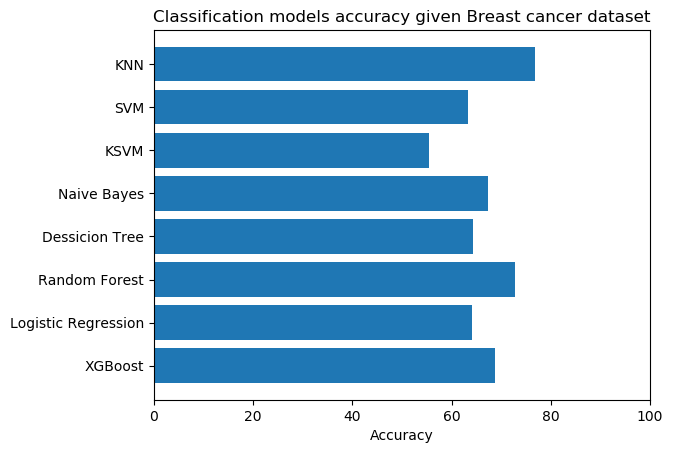

In [131]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
classificators = ("KNN", "SVM", "KSVM", "Naive Bayes", "Dessicion Tree", "Random Forest", "Logistic Regression", "XGBoost")
arr_acuracy = [knn_acuracy * 100, svm_acuracy * 100, ksvm_acuracy * 100, naive_bayes_acuracy * 100, tree_acuracy * 100, random_tree_acuracy * 100, logistic_acuracy * 100, xgboost_acuracy * 100];
y_pos = np.arange(len(classificators))
ax.set_xlim([0,100])
ax.barh(y_pos, arr_acuracy,  align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(classificators)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Classification models accuracy given Breast cancer dataset')

plt.show()